# Challenge $0$


## 1. ***Data cleaning with Pandas***

Use the library `pandas` to load and clean the required dataset.

In [552]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

Obtain the data file

In [553]:
FFILE = './50_Startups.csv'
"""if os.path.isfile(FFILE):
    print("File already exists")
    if os.access(FFILE, os.R_OK):
        print ("File is readable")
    else:
        print ("File is not readable, removing it and downloading again")
        !rm FFILE
        !curl "https://raw.github.com/alexdepremia/ML_IADA_UTs/main/challenge_0/50_Startups.csv"
else:
    print("Either the file is missing or not readable, download it")
    !curl "https://raw.github.com/alexdepremia/ML_IADA_UTs/main/challenge_0/50_Startups.csv"
    """

'if os.path.isfile(FFILE):\n    print("File already exists")\n    if os.access(FFILE, os.R_OK):\n        print ("File is readable")\n    else:\n        print ("File is not readable, removing it and downloading again")\n        !rm FFILE\n        !curl "https://raw.github.com/alexdepremia/ML_IADA_UTs/main/challenge_0/50_Startups.csv"\nelse:\n    print("Either the file is missing or not readable, download it")\n    !curl "https://raw.github.com/alexdepremia/ML_IADA_UTs/main/challenge_0/50_Startups.csv"\n    '

Nota: ho scaricato il dataset manualmente>

In [554]:
import pandas as pd

# Load the dataset using Pandas
data = pd.read_csv(f'./data/{FFILE}')

# Extracting the features (independent variables) and labels (dependent variable)
# Features (X) are taken from all columns except the last two
features = data.iloc[:, :-2].values

# Labels (y) are taken from the third column (index 3, considering the 0-based index in Python)
labels = data.iloc[:, 3].values

df = pd.DataFrame(data)

In [555]:
labels

array(['New York', 'California', 'Florida', 'New York', 'Florida',
       'New York', 'California', 'Florida', 'New York', 'California',
       'Florida', 'California', 'Florida', 'California', 'Florida',
       'New York', 'California', 'New York', 'Florida', 'New York',
       'California', 'New York', 'Florida', 'Florida', 'New York',
       'California', 'Florida', 'New York', 'Florida', 'New York',
       'Florida', 'New York', 'California', 'Florida', 'California',
       'New York', 'Florida', 'California', 'New York', 'California',
       'California', 'Florida', 'California', 'New York', 'California',
       'New York', 'Florida', 'California', 'New York', 'California'],
      dtype=object)

***Play with data***

In [556]:
df.shape

(50, 5)

In [557]:
df.replace(to_replace = 0.00, value = df.mean(axis=0, numeric_only=True), inplace=True)  # inject the mean of the column when value is 0
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


 **`df.replace()` function:**
   - This function is used to replace specific values within a DataFrame (`df`) with another value.
   - The parameters used are:
     - `to_replace=0.00`: This specifies the value in the DataFrame that needs to be replaced, in this case, `0.00`.
     - `value=df.mean(axis=0)`: This sets the replacement value for the matched condition. Here, `df.mean(axis=0)` calculates the mean for each column along the rows (axis=0) of the DataFrame `df`. The mean value for each column will replace the `0.00` values.
     - `inplace=True`: This parameter ensures that the modification is done directly on the original DataFrame (`df`) without creating a new DataFrame. If `inplace` is set to `True`, the original DataFrame is modified.

***Select two categories for binary classification***

In [558]:
df_sel=df[(df.State=="California") | (df.State=="Florida")]

In [559]:
df_sel.head() # column title and first rows of the dataset

,R&D Spend,Administration,Marketing Spend,State,Profit
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
4,142107.34,91391.77,366168.42,Florida,166187.94
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60


In [560]:
df_sel.dtypes # type of each column

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

***Encode categorical data***

One-hot encoding of categorical feature _State_

One-Hot Encoding is a technique used in machine learning to handle categorical variables by transforming them into a format that can be easily utilized by algorithms.

Imagine having a categorical variable, such as colors: red, green, and blue. With One-Hot Encoding, each color becomes a new binary column. If an observation has a specific color, the column corresponding to that color will be set to 1, while the other columns will be set to 0.

For example:
- If you have categories "red", "green", "blue", and you want to encode them using One-Hot Encoding:
  - "red" becomes [1, 0, 0]
  - "green" becomes [0, 1, 0]
  - "blue" becomes [0, 0, 1]

This helps machine learning algorithms to understand and work with these categorical variables more effectively, as it doesn't impose an order or hierarchy among the categories but rather represents them in a form that the algorithm can interpret more efficiently.

In [561]:
df_one = pd.get_dummies(df_sel["State"], dtype=int)

In [562]:
df_one.head()

,California,Florida
1,1,0
2,0,1
4,0,1
6,1,0
7,0,1


In [563]:
# construct the final dataset that you will use for learning and prediction
df_fin = pd.concat((df_one, df_sel), axis=1)
df_fin = df_fin.drop(["Florida"], axis=1)
df_fin = df_fin.drop(["State"], axis=1)
# California is class 1, Florida is class 0
df_fin = df_fin.rename(columns={"California": "State"})
df_fin.head()

,State,R&D Spend,Administration,Marketing Spend,Profit
1,1,162597.70,151377.59,443898.53,191792.06
2,0,153441.51,101145.55,407934.54,191050.39
4,0,142107.34,91391.77,366168.42,166187.94
6,1,134615.46,147198.87,127716.82,156122.51
7,0,130298.13,145530.06,323876.68,155752.60


In [564]:
# Constructing the final dataset for learning and prediction

# Concatenating two DataFrames 'df_one' and 'df_sel' along columns (axis=1)
df_fin = pd.concat((df_one, df_sel), axis=1)

# Dropping the column "Florida" from the dataset as it was not selected for the final model
df_fin = df_fin.drop(["Florida"], axis=1)

# Dropping the column "State" (assumed to be the original 'State' column) as it is not required in its original form
df_fin = df_fin.drop(["State"], axis=1)

# Renaming the column "California" to "State" as part of preparing the dataset for classification (1 for California, 0 for Florida)
df_fin = df_fin.rename(columns={"California": "State"})

# Displaying the initial rows of the modified final dataset
df_fin.head()

,State,R&D Spend,Administration,Marketing Spend,Profit
1,1,162597.70,151377.59,443898.53,191792.06
2,0,153441.51,101145.55,407934.54,191050.39
4,0,142107.34,91391.77,366168.42,166187.94
6,1,134615.46,147198.87,127716.82,156122.51
7,0,130298.13,145530.06,323876.68,155752.60


***Normalize***

Divide by the absolute value of the maximum so that features are in \[0, 1\]

In [565]:
def absolute_maximum_scale(series):
    return series / series.abs().max()

for col in df_fin.columns:
    df_fin[col] = absolute_maximum_scale(df_fin[col])

In [566]:
def absolute_maximum_scale(series):
    """
    Scale each column in the DataFrame 'df_fin' by dividing the values by the absolute maximum value of that column.

    Args:
    series: A pandas Series or DataFrame column to be scaled.

    Returns:
    A scaled version of the input series with values ranging from -1 to 1 based on the maximum absolute value in the column.
    """
    return series / series.abs().max()

In [567]:
# Apply the 'absolute_maximum_scale' function to each column in the DataFrame 'df_fin'
for col in df_fin.columns:
    df_fin[col] = absolute_maximum_scale(df_fin[col])

In [568]:
df_fin.head()

,State,R&D Spend,Administration,Marketing Spend,Profit
1,1.0,1.000000,0.828805,1.000000,1.000000
2,0.0,0.943688,0.553781,0.918982,0.996133
4,0.0,0.873981,0.500378,0.824892,0.866501
6,1.0,0.827905,0.805926,0.287716,0.814020
7,0.0,0.801353,0.796789,0.729619,0.812091


In [569]:
df_fin.shape

(33, 5)

## ***Classification***

Prepare the dataset:

In [570]:
y = df_fin["State"] # ground truth labels
X = df_fin.drop(["State"], axis=1) # datapoints features


Train test split

$75\%$ of the data are in the training set, the remaining $25\%$ constitutes the test set.

In [571]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into training and testing sets
# X represents the features (independent variables), and y represents the target (dependent variable).

# Using train_test_split function to create the training and testing sets
# X_train and y_train: Training features and labels
# X_test and y_test: Testing features and labels

# The 'test_size=0.25' parameter sets the proportion of the dataset to include in the test split. Here, 25% of the data is allocated to the test set.
# The 'random_state=0' parameter sets the random seed for reproducibility of the split.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)


Train the Logistic Regression Model

In [572]:
from sklearn.linear_model import LogisticRegression

In [573]:
# Creating a Logistic Regression model with specific parameters
# - 'random_state=0' ensures reproducibility by setting the random seed.
# - 'solver='lbfgs'' selects the optimization algorithm for the logistic regression.

LR = LogisticRegression(random_state=0, solver='lbfgs').fit(X_train, y_train)

# Predicting the target variable (y) using the Logistic Regression model on the test set (X_test).
predictions = LR.predict(X_test)

# Calculating and rounding the accuracy score of the Logistic Regression model on the test set.
# The score is calculated by comparing the predicted values to the actual values (y_test).
accuracy = round(LR.score(X_test, y_test), 4)
print(accuracy)


0.3333


***Plot results***

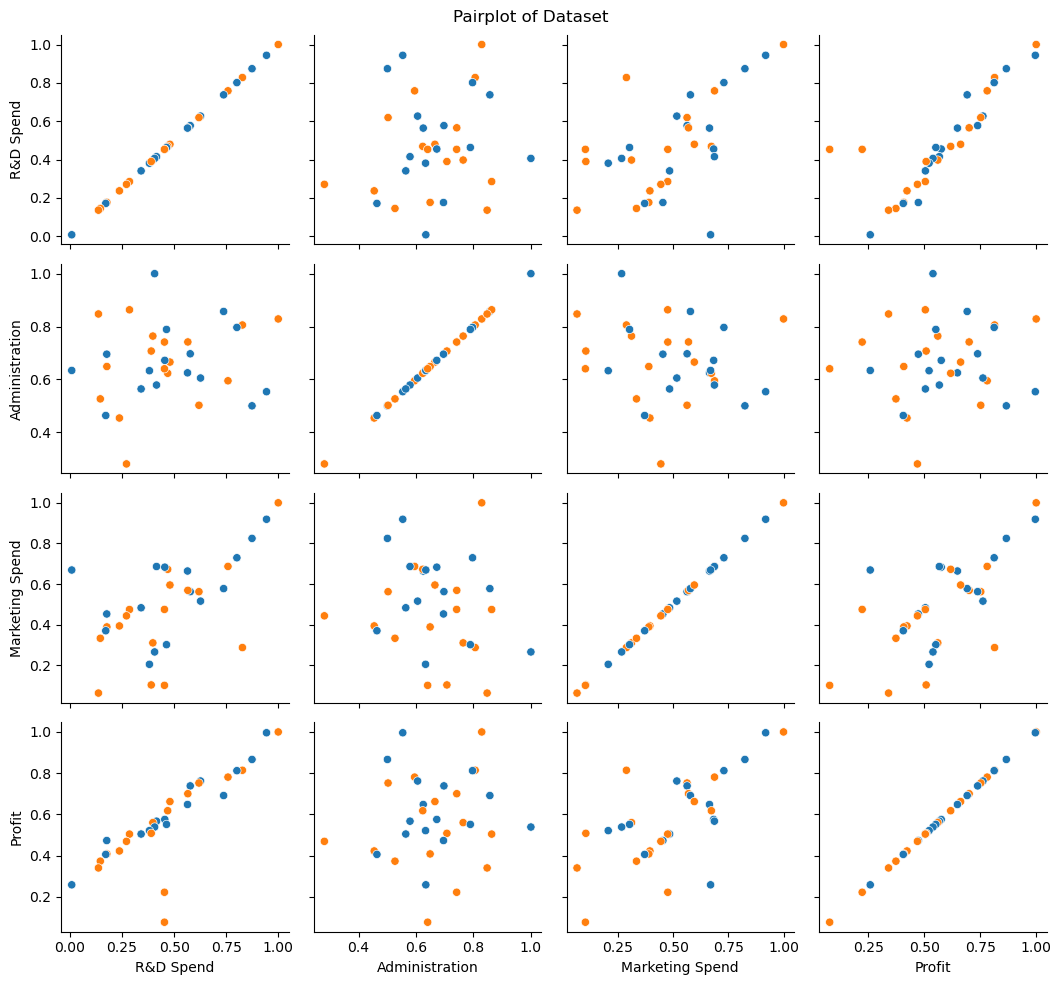

In [574]:
import seaborn as sns

# Plot pairplot of the dataset to see if there are correlations between the variables
g = sns.pairplot(pd.concat([X,y]), hue="State", kind="scatter", diag_kind=None)
plt.suptitle("Pairplot of Dataset")
g._legend.remove()
plt.tight_layout()
plt.show()

In [575]:
X = X.values
y = y.values

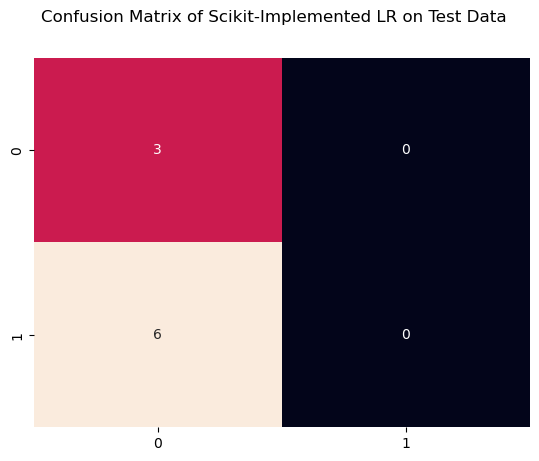

In [576]:
# Plot Confusion Matrix
from sklearn.metrics import confusion_matrix
M_test = confusion_matrix(y_test, predictions)

sns.heatmap(M_test, annot=True, cbar=False)
plt.suptitle("Confusion Matrix of Scikit-Implemented LR on Test Data")
plt.show()

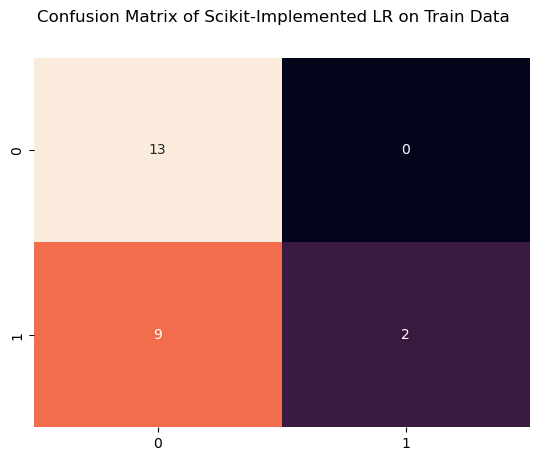

In [577]:
# Plot Confusion Matrix

y_pred_train = LR.predict(X_train)

from sklearn.metrics import confusion_matrix
M_train = confusion_matrix(y_train, y_pred_train)

sns.heatmap(M_train, annot=True, cbar=False)
plt.suptitle("Confusion Matrix of Scikit-Implemented LR on Train Data")
plt.show()

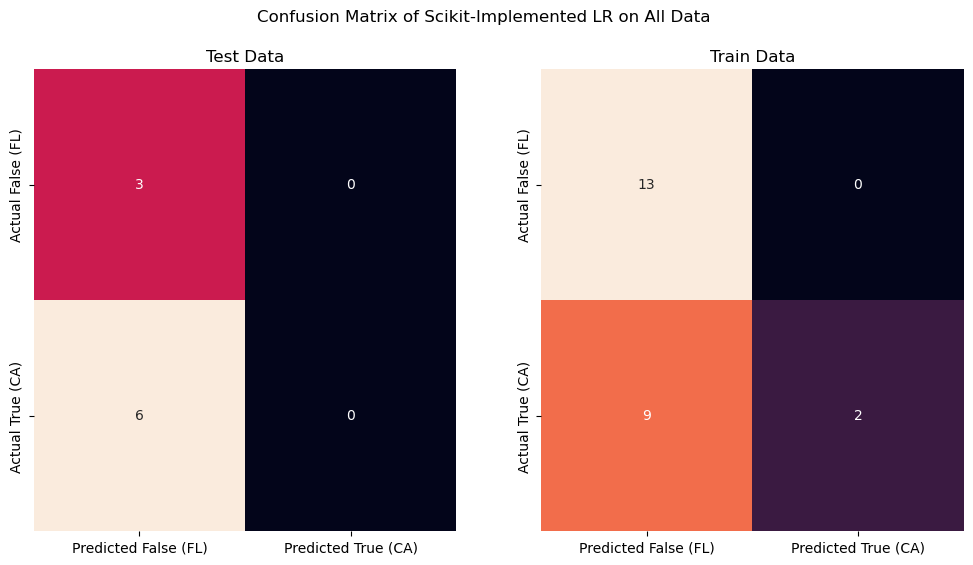

In [578]:
# Plot both on the same figure
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
plt.suptitle("Confusion Matrix of Scikit-Implemented LR on All Data")
axes[0].set_title('Test Data')
sns.heatmap(M_test, annot=True, cbar=False, ax=axes[0], xticklabels=['Predicted False (FL)', 'Predicted True (CA)'],
            yticklabels=['Actual False (FL)', 'Actual True (CA)'])

axes[1].set_title('Train Data')
sns.heatmap(M_train, annot=True, cbar=False, ax=axes[1], xticklabels=['Predicted False (FL)', 'Predicted True (CA)'],
            yticklabels=['Actual False (FL)', 'Actual True (CA)'])

plt.show()


***Add regularization***

Implement from scratch the regularized logistic regression model (with all the regularization techniques seen during the course).

We have seen:
- L1 Regularization (LASSO)
- L2 Regularization (Ridge)
- Elastic Net Regularization 


In [579]:
# Define Loss Function for Logistic Regression
def sigmoid(x, w):
    """
    Parameters
    ----------
    x : array of dim n
        Array containing the datapoint
    w : float
        Number representing the 'temperature' of the sigmoid
    """
    y = (np.exp(np.dot(x, w)))/(1+np.exp(np.dot(x,w)))
    return y


def OLSGradient(X, labels, w):
    #TODO: REPLACE FUNCTION TITLE
    """
    Parameters
    ----------
    X : array of dim n x d
        Matrix containing the dataset
    y : array of dim n
        Vector representing the ground truth label of each data point
    w : array of dim d
        Vector representing the coefficients of the logistic model
    """
    n = np.shape(X)[0]

    update = 2/n * (np.transpose(X) @ (sigmoid(X, w) - labels))
    
    return update

In [580]:
# L1 Regularizer
import scipy.linalg as LA

def L1_subgradient(z):
    """
    Compute the subgradient of the absolute value function element-wise.

    Parameters:
    ----------
    z : array-like
        Input array for which the subgradient is calculated.

    Returns:
    ----------
    g : array-like
        Subgradient of the absolute value function applied element-wise to `z`.
    """
    # Create an array g of the same shape as z, initialized with all 1s.
    g = np.ones(z.shape)

    # Check each element of z.
    for i in range(z.shape[0]):
        # If the element is negative, set the corresponding element in g to -1.
        if z[i] < 0.:
            g[i] = -1.0

    # Return the resulting array g, representing the subgradient.
    return g

def LassoGradient(w, lam):
    return lam * L1_subgradient(w)

# L2 Regularizer
def RidgeGradient(w, lam):
    return 2*lam*w

In [ ]:
# Elastic Net
def ElasticNetGradient(w, lr, l):
    """
    Calculate the gradient for Elastic Net regularization.

    Parameters
    ----------
    lr : float
        Convex combination parameter (controls L1 vs. L2 regularization).
    l : float
        Regularization strength parameter.
    points : int
        Number of data points.

    Returns
    -------
    gradient : array of float of dim d
        Gradient of the Elastic Net regularization term.
    """
    return (1 - lr) * RidgeGradient(w, l) + lr * LassoGradient(w, l)

In [ ]:
# Generalized Gradient Descent:
from typing import Union, Literal, List

def GD_LR(X: np.array, 
          y: np.array, 
          iter: int, 
          eta: float, 
          reg: Union[Literal["lasso"], Literal["ridge"], Literal["elasticnet"], None], 
          lam: List[int]) -> np.array:
    """
    Trains a Logistic Regression on the dataset X on the classes y.

    Parameters:
    - iter: numbers of iterations
    - eta: learning rate
    - reg: regularization factor. represented as a string, and it can be:
        - lasso: uses L1 norm regularization
        - ridge: uses L2 norm regularization
        - elasticnet: uses Elastic Net regularization
    - lam: regularization coefficient (depends on the regularizator used)

    Returns:
    - W: weight of the logistic regressor
    """
    try:
        X = X.values
        y = y.values
    except:
        pass
    
    d = len(X[0]) # get dimension of the dataset


    w = np.zeros(d)          # Initialize weights with zeros

    for i in range(iter):
        # Update weights accoring to GD
        reg_fac = 0

        if reg == "lasso":
            reg_fac = LassoGradient(w, *lam)

        elif reg == "ridge": 
            reg_fac = RidgeGradient(w, *lam)

        elif reg == "elasticnet":
            reg_fac = ElasticNetGradient(w, *lam)

        elif reg == None:
            pass

        else:
            print("Warning: regularizator passed is invalid. It has been treated as None.")

        w = w - eta*(OLSGradient(X, y, w) + reg_fac)

    print(w)
    return w

In [583]:
eta = 0.001
lam_L1 = [1]
lam_L2 = [2]
lam_2 = [0.5, 1]
n = 10000

# Define Parameters for each model
OLS_LR = GD_LR(X_train, y_train, n, eta, None, None)
L1_LR = GD_LR(X_train, y_train, n, eta, "lasso", lam_L1)
L2_LR = GD_LR(X_train, y_train, n, eta, "ridge", lam_L2)
EN_LR = GD_LR(X_train, y_train, n, eta, "elasticnet", lam_2)

[ 0.2850028   0.10039174 -0.41750557 -0.24309387]
[ 0.00010068 -0.00033736  0.00082319 -0.00019181]
[-5.13228862e-05 -6.42293955e-03 -1.89662664e-02 -1.50124188e-02]
[ 2.07024849e-04  8.80253291e-05 -3.38161432e-04 -5.04294183e-04]


In [584]:
def predict(w, x, threshold = 0.5):
    """
    Given a datapoint x, predict his target class according to the weight w
    """
    logit = (np.exp(x @ w))/(1+np.exp(x @ w))

    converted = 1 if logit>=threshold else 0
    
    return converted

***Model assessment***

Given true and predicted values, compute the most common classification metrics to assess the quality of your predictions.

In [585]:
from sklearn.metrics import classification_report
y_true = y_test
y_pred = LR.predict(X_test)

target_names = ['California', 'Florida']
print(round(LR.score(X_test, y_test), 4))
print(classification_report(y_true, y_pred, target_names=target_names))

0.3333
              precision    recall  f1-score   support

  California       0.33      1.00      0.50         3
     Florida       0.00      0.00      0.00         6

    accuracy                           0.33         9
   macro avg       0.17      0.50      0.25         9
weighted avg       0.11      0.33      0.17         9



c:\Users\ACER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ACER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ACER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Repeat the previous task for regularized logistic regression and compare the results.

[1, 0, 1, 0, 1, 1, 1, 0, 1]
              precision    recall  f1-score   support

  California       0.33      0.33      0.33         3
     Florida       0.67      0.67      0.67         6

    accuracy                           0.56         9
   macro avg       0.50      0.50      0.50         9
weighted avg       0.56      0.56      0.56         9



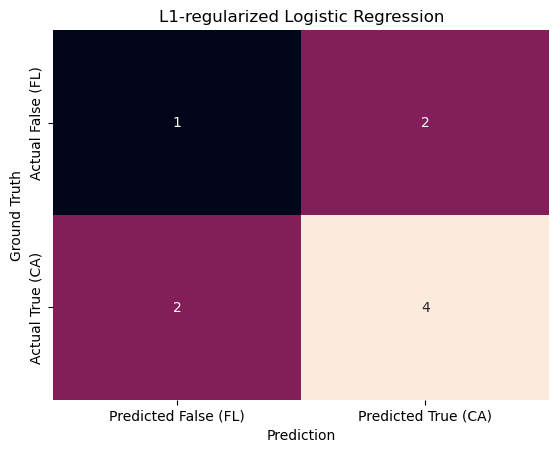

In [586]:
# L1 Regularized LR:
y_pred_L1 = [predict(L1_LR, x) for x in X_test.values]
print(y_pred_L1)
print(classification_report(y_true, y_pred_L1, target_names=target_names))

M_L1 = confusion_matrix(y_true, y_pred_L1)

sns.heatmap(M_L1, annot=True, cbar=False,
            xticklabels=['Predicted False (FL)', 'Predicted True (CA)'],
            yticklabels=['Actual False (FL)', 'Actual True (CA)'])
plt.xlabel("Prediction")
plt.ylabel("Ground Truth")
plt.title("L1-regularized Logistic Regression")

plt.show()

[0, 0, 0, 0, 0, 0, 0, 0, 0]
              precision    recall  f1-score   support

  California       0.33      1.00      0.50         3
     Florida       0.00      0.00      0.00         6

    accuracy                           0.33         9
   macro avg       0.17      0.50      0.25         9
weighted avg       0.11      0.33      0.17         9



c:\Users\ACER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ACER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ACER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


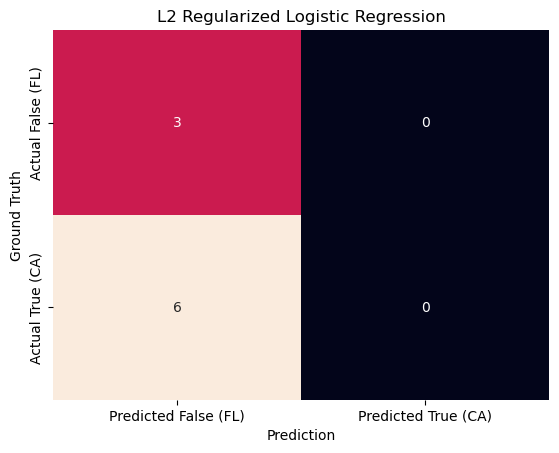

In [587]:
# L2 Regularized LR:
y_pred_L2 = [predict(L2_LR, x) for x in X_test.values]
print(y_pred_L2)
print(classification_report(y_true, y_pred_L2, target_names=target_names))

M_L2 = confusion_matrix(y_true, y_pred_L2)

sns.heatmap(M_L2, annot=True, cbar=False,
            xticklabels=['Predicted False (FL)', 'Predicted True (CA)'],
            yticklabels=['Actual False (FL)', 'Actual True (CA)'])
plt.xlabel("Prediction")
plt.ylabel("Ground Truth")
plt.title("L2 Regularized Logistic Regression")

plt.show()

[0, 0, 0, 0, 0, 0, 0, 0, 0]
              precision    recall  f1-score   support

  California       0.33      1.00      0.50         3
     Florida       0.00      0.00      0.00         6

    accuracy                           0.33         9
   macro avg       0.17      0.50      0.25         9
weighted avg       0.11      0.33      0.17         9



c:\Users\ACER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ACER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ACER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


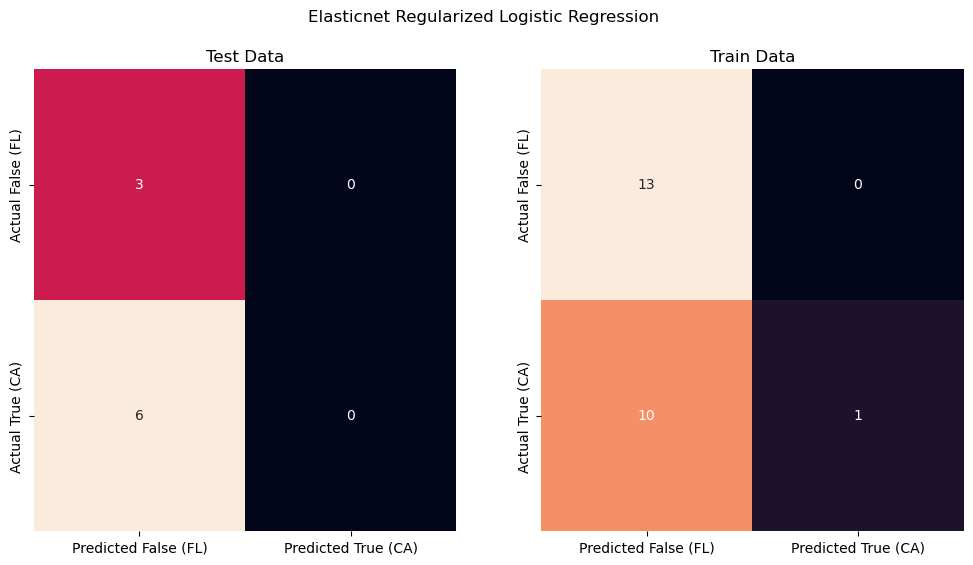

In [588]:
# Elasticned Regularized LR:
y_pred_EN = [predict(EN_LR, x) for x in X_test.values]
print(y_pred_EN)
print(classification_report(y_test, y_pred_EN, target_names=target_names))

M_test = confusion_matrix(y_test, y_pred_EN)
M_train = confusion_matrix(y_train, [predict(EN_LR, x) for x in X_train.values])


fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.heatmap(M_test, annot=True, cbar=False,
            xticklabels=['Predicted False (FL)', 'Predicted True (CA)'],
            yticklabels=['Actual False (FL)', 'Actual True (CA)'], ax=axes[0])

sns.heatmap(M_train, annot=True, cbar=False,
            xticklabels=['Predicted False (FL)', 'Predicted True (CA)'],
            yticklabels=['Actual False (FL)', 'Actual True (CA)'], ax=axes[1])

plt.suptitle("Elasticnet Regularized Logistic Regression")
axes[0].set_title("Test Data")
axes[1].set_title("Train Data")
plt.show()



plt.show()

***ROC curve***

Implement a function for producing the Receiver Operating Characteristic (ROC) curve.

Given true and predicted values, plot the ROC curve using your implemented function.

In [ ]:

def ROC(X_test, y_test, w, ax, name):
    """
    Parameters
    ----------
    X_test : array of shape (m, d)
        Test values to assign to a class
    y_test : array of shape (m,)
        True labels of predicted data
    w : array of shape (d,)
        Weight vector obltained after training
    ax : matplotlib axe to plot on
    name : name of the model used
    """

    a = np.sort(1/(1+(np.exp(-(X_test @ w)))))   # Tresholds for ROC
    TPR = np.ones(len(a))                        # True positive rate
    FPR = np.ones(len(a))                        # False positive rate
    y_test = y_test.astype(int)                  # True labels

    for idx, elem in enumerate(a):
        y_pred = np.array([predict(x, w, elem) for x in X_test.values]).astype(int)

        TP = np.sum((y_pred == 1) & (y_test == 1))  # True positives
        FP = np.sum((y_pred == 1) & (y_test == 0))  # False positives
        FN = np.sum((y_pred == 0) & (y_test == 1))  # False negatives
        TN = np.sum((y_pred == 0) & (y_test == 0))  # True negatives

        TPR[idx] = TP / (TP + FN) if (TP + FN) > 0 else 0  # True Positive Rate
        FPR[idx] = FP / (FP + TN) if (FP + TN) > 0 else 0  # False Positive Rate

    # Plot the ROC curve on the ax
    ax.plot(FPR,TPR, label="ROC Curve", color="blue")
    ax.plot([0, 1], [0, 1], 'r--', label="Random Classifier")
    ax.scatter(FPR, TPR, color = 'blue', label = "Observations")
    ax.set_xlabel("False Positive Rate")
    ax.set_ylabel("True Positive Rate")
    ax.set_title(f"ROC Curve ({name})")
    ax.legend(loc="lower right")
    ax.grid(True)

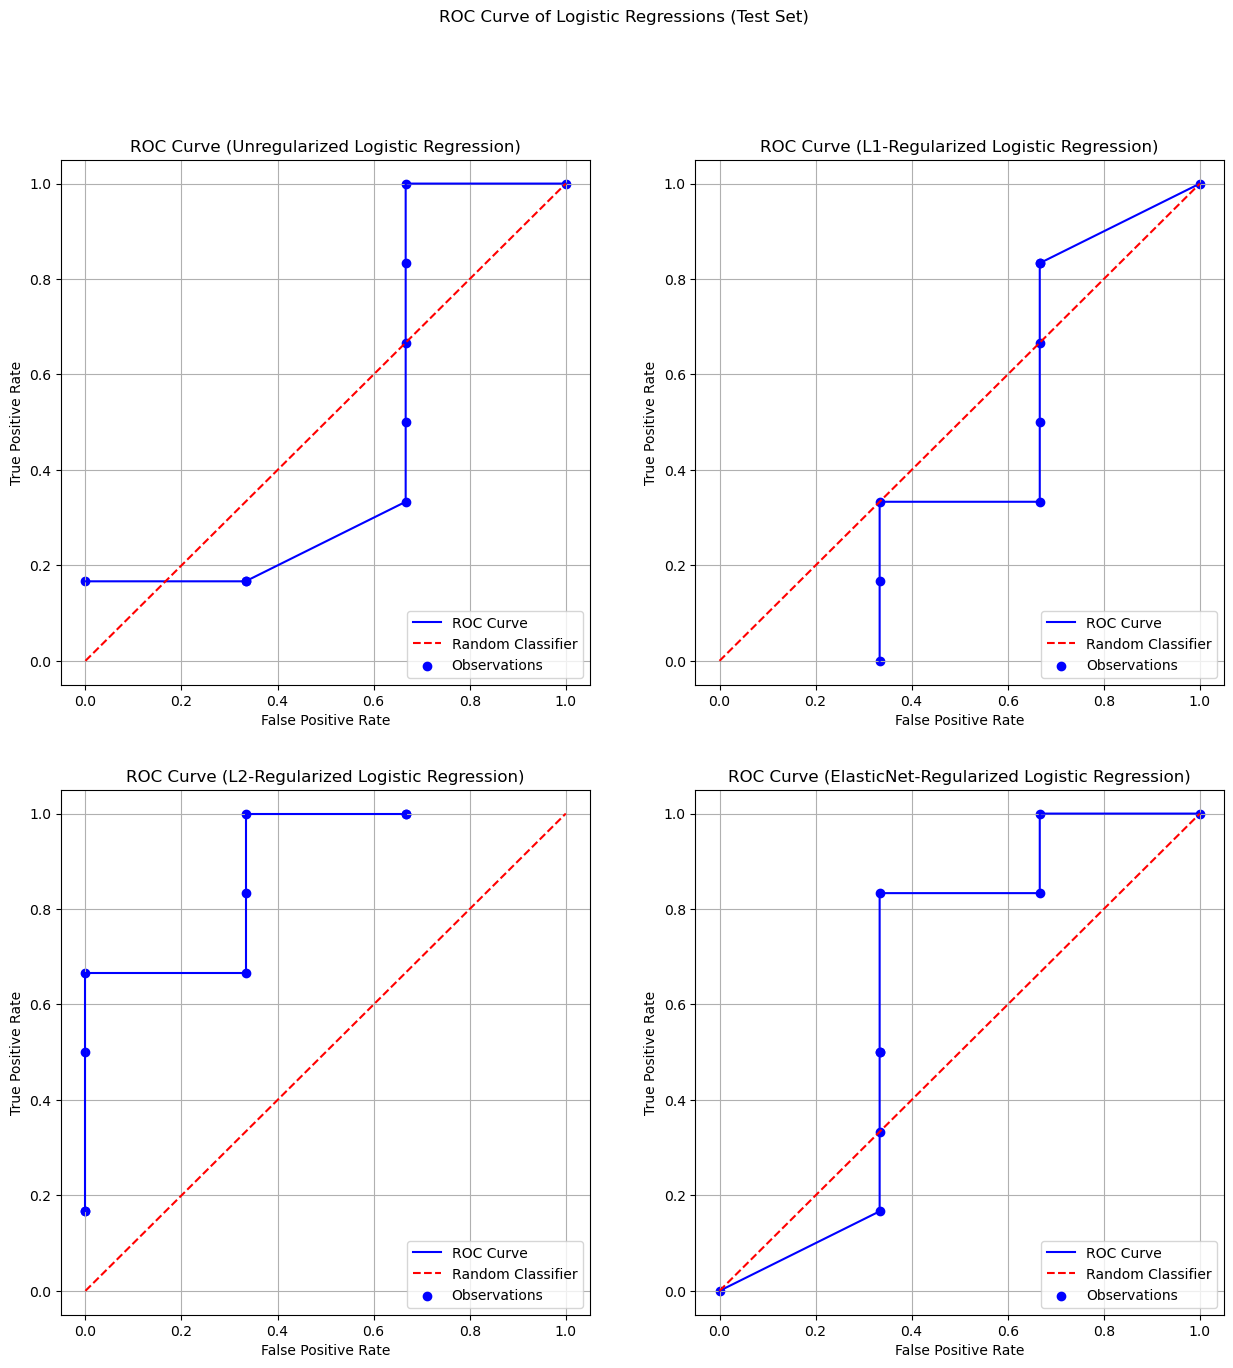

In [596]:
to_iterate = {
    'Unregularized Logistic Regression': OLS_LR,
    'L1-Regularized Logistic Regression': L1_LR,
    'L2-Regularized Logistic Regression': L2_LR,
    'ElasticNet-Regularized Logistic Regression': EN_LR
    }

l = list(to_iterate.keys())

fig, my_axes = plt.subplots(2,2, figsize=(15,15))

ctr = 0
for i in (0, 1):
    for j in (0, 1):
        ROC(X_test, y_test, to_iterate[l[ctr]], my_axes[i][j], l[ctr])
        ctr += 1

plt.suptitle("ROC Curve of Logistic Regressions (Test Set)")
plt.show()

### Extra: Hyperparameter tuning with Scikit-Learn

In [591]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from scipy.stats import uniform

# L1
lr = LogisticRegression(solver="saga", penalty='l1', max_iter=10000)
domain = {"C":uniform(loc=0, scale=4)}
clf = RandomizedSearchCV(lr, domain, random_state=0)
clf.fit(X, y)
print(clf.best_params_, clf.best_score_)

{'C': 1.6946191973556188} 0.5142857142857142


In [592]:
# L2
lr = LogisticRegression(solver="saga", penalty='l2', max_iter=10000)
domain = {"C":uniform(loc=0, scale=4)}
clf = RandomizedSearchCV(lr, domain, random_state=0)
clf.fit(X, y)
print(clf.best_params_, clf.best_score_)

{'C': 3.854651042004117} 0.5428571428571429


In [400]:
# Elasticnet
lr = LogisticRegression(solver="saga", penalty='elasticnet', max_iter=10000)
domain = {"l1_ratio": uniform(), "C": uniform(loc=0, scale=4)}
clf = RandomizedSearchCV(lr, domain, random_state=0)
clf.fit(X, y)
print(clf.best_params_, clf.best_score_)

{'C': 2.195254015709299, 'l1_ratio': 0.7151893663724195} 0.48571428571428577
